# **Deep Learning**

As a ML engineer I want to develop deep learning models that capture complex customer behavior patterns So that we improve prediction accuracy and discover hidden insights

## **Requirements:**
 - Build DNN regressor with 4 hidden layers (128, 64, 32, 16 neurons) for CLV prediction
 - Implement Autoencoders for unsupervised customer feature learning
 - Use cluster memberships as additional input features to DNN
 - Apply batch normalization and dropout regularization (0.3)
 - Compare deep learning performance against traditional ensemble methods
 - Use embedding layers for high-cardinality categorical features
 - Implement early stopping to prevent overfitting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from sklearn.cluster import KMeans
from xgboost import XGBRegressor
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import silhouette_score
import joblib

# Load Data

In [2]:
RFM_Cluster = pd.read_csv(r"C:\Users\USER\ِAI_Project\ML Projects\CLV Prediction & Segmentation\Building models\Unsupervised ML\RFM_Cluster_mms.csv")
RFM_std = pd.read_csv(r"C:\Users\USER\ِAI_Project\ML Projects\CLV Prediction & Segmentation\Preprocessing\rfm_std.csv")
RFM = pd.read_csv(r"C:\Users\USER\ِAI_Project\ML Projects\CLV Prediction & Segmentation\Preprocessing\RFM.csv")
data = pd.read_csv(r"C:\Users\USER\ِAI_Project\ML Projects\CLV Prediction & Segmentation\Preprocessing\data.csv")
df_rfm = RFM_std

In [3]:
Scaler = joblib.load(r"C:\Users\USER\ِAI_Project\ML Projects\CLV Prediction & Segmentation\Building models\Unsupervised ML\MinMaxScaler_rmf.pkl")

In [4]:
df_rfm.head(2)

,Recency,Frequency,Monetary,CLV
0,0.002681,0.028986,0.016241,5.0
1,0.198391,0.014493,0.006766,3.4


In [5]:
TARGET = "CLV"
x = df_rfm.drop(columns=[TARGET])
y = df_rfm[TARGET]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

In [7]:
RFM_Cluster = RFM.copy()
RFM_Cluster.drop('CustomerID', axis=1, inplace=True)

In [8]:
matrex_std = Scaler.transform(RFM_Cluster)
matrex_std

array([[2.68096515e-03, 2.89855072e-02, 1.62406832e-02, 1.00000000e+00],
       [1.98391421e-01, 1.44927536e-02, 6.76587670e-03, 6.00000000e-01],
       [4.82573727e-02, 0.00000000e+00, 5.48501540e-03, 4.50000000e-01],
       ...,
       [1.87667560e-02, 4.83091787e-03, 6.60434089e-04, 5.00000000e-01],
       [8.04289544e-03, 7.24637681e-02, 7.70209811e-03, 1.00000000e+00],
       [1.12600536e-01, 9.66183575e-03, 6.91685461e-03, 6.75000000e-01]])

In [9]:
RFM_Cluster_scaler = pd.DataFrame(matrex_std, columns=RFM_Cluster.columns)
RFM_Cluster_scaler.head()

,Recency,Frequency,Monetary,CLV
0,0.002681,0.028986,0.016241,1.000
1,0.198391,0.014493,0.006766,0.600
2,0.048257,0.000000,0.005485,0.450
3,0.828418,0.000000,0.001250,0.075
4,0.093834,0.028986,0.006270,0.775


# 1. DNN regressor

In [10]:
DNN_reg = Sequential()

# input layer
DNN_reg.add(Dense(128,  activation='relu',input_dim=x_train.shape[1]))
DNN_reg.add(BatchNormalization())
DNN_reg.add(Dropout(0.3))

# hidden layers
DNN_reg.add(Dense(64, activation='relu'))
DNN_reg.add(BatchNormalization())
DNN_reg.add(Dropout(0.3))
DNN_reg.add(Dense(32, activation='relu'))
DNN_reg.add(Dense(16, activation='relu'))

# output layer
DNN_reg.add(Dense(1, activation='linear'))

C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
DNN_reg.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 11,777 (46.00 KB)

 Non-trainable params: 384 (1.50 KB)

In [12]:
DNN_reg.compile(optimizer='adam', loss='mse', metrics=['r2_score'])

In [13]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [14]:
hist = DNN_reg.fit( x_train, y_train, validation_split=0.2,
                        epochs=50, batch_size=32,callbacks=[early_stop], verbose=1)

Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.3891 - r2_score: 0.0457 - val_loss: 5.1276 - val_r2_score: -2.6370
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7043 - r2_score: 0.5162 - val_loss: 2.5687 - val_r2_score: -0.8219
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5199 - r2_score: 0.6429 - val_loss: 1.3244 - val_r2_score: 0.0606
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4699 - r2_score: 0.6772 - val_loss: 0.9652 - val_r2_score: 0.3154
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4007 - r2_score: 0.7247 - val_loss: 0.7544 - val_r2_score: 0.4649
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3746 - r2_score: 0.7427 - val_loss: 0.5392 - val_r2_score: 0.6176
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3317 - r2_score: 0.7722 - val_loss: 0.5519 - val_r2_score: 0.6085
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3083 - r2_score: 0.7882 - val_loss: 0.3285 - val_r2_scor

In [15]:
y_pred = DNN_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2: {r2*100:.2f}%")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE: 0.1017
MAE: 0.2480
R2: 93.17%


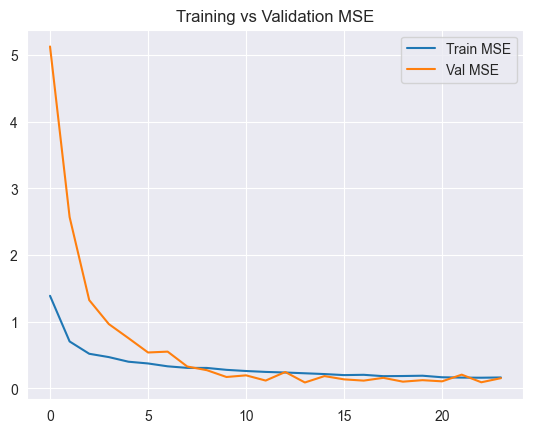

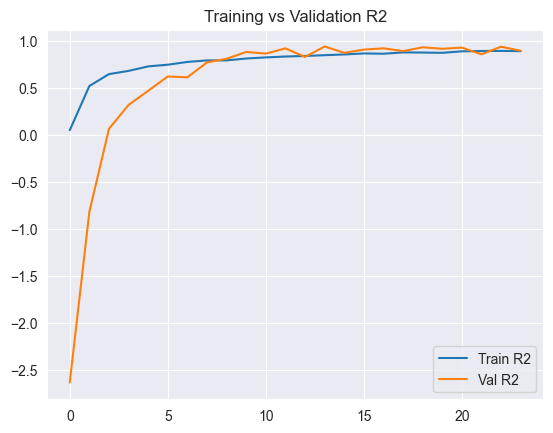

In [16]:
plt.plot(hist.history['loss'], label='Train MSE')
plt.plot(hist.history['val_loss'], label='Val MSE')
plt.legend()
plt.title("Training vs Validation MSE")
plt.show()

plt.plot(hist.history['r2_score'], label='Train R2')
plt.plot(hist.history['val_r2_score'], label='Val R2')
plt.legend()
plt.title("Training vs Validation R2")
plt.show()

In [17]:
import json

# Save history
with open("../../Streamlit/history.json", "w") as f:
    json.dump(hist.history, f)

In [18]:
DNN_reg.save("DNN_CLV_predict.keras")


# 2. Autoencoder

In [19]:
input_dim = RFM_Cluster_scaler.shape[1]
latent_dim =RFM_Cluster_scaler.shape[1]


AutModel = Sequential()

# Encoder
inp = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(inp)
encoded = Dense(32, activation='relu')(encoded)
latent = Dense(latent_dim, activation='linear')(encoded)

# Decoder
decoded = Dense(32, activation='relu')(latent)
decoded = Dense(64, activation='relu')(decoded)
out = Dense(input_dim, activation='linear')(decoded)

# Build model
autoencoder = Model(inp, out)
encoder = Model(inp, latent)

In [20]:
autoencoder.compile(optimizer='adam', loss='mse')

In [21]:
autoencoder.fit(RFM_Cluster_scaler, RFM_Cluster_scaler,
                epochs=30, batch_size=32, validation_split=0.1)

Epoch 1/30
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0325 - val_loss: 0.0023
Epoch 2/30
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.4443e-04 - val_loss: 7.9010e-04
Epoch 3/30
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7457e-04 - val_loss: 5.5216e-04
Epoch 4/30
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3562e-04 - val_loss: 3.7370e-04
Epoch 5/30
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4291e-04 - val_loss: 2.9268e-04
Epoch 6/30
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1522e-04 - val_loss: 2.5976e-04
Epoch 7/30
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0165e-04 - val_loss: 2.4982e-04
Epoch 8/30
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.5163e-05 - val_loss: 2.3566e-04
Epoch 9/30
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.0350e-05 - val_loss: 2.2166e-04
Epoch 10/30
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9037e-05 - val_loss: 2.1898e-04
Epoch 11/30
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5753

In [22]:
data_lat = encoder.predict(RFM_Cluster_scaler)

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step


In [23]:
data_lat

array([[-0.71933466, -0.2847514 , -0.08074754, -0.02253511],
       [-0.46280745, -0.2325118 ,  0.1105908 ,  0.01285315],
       [-0.2670506 , -0.12057801,  0.0327496 , -0.03995161],
       ...,
       [-0.29918924, -0.11200719,  0.00704305, -0.04718925],
       [-0.7445403 , -0.24286118, -0.0659187 ,  0.00813256],
       [-0.4837272 , -0.21744   ,  0.04113454, -0.01592383]],
      dtype=float32)

# 3. Cluster Memberships

In [24]:
s_scores = []
for k in range(2 , 10):
    model = KMeans(n_clusters=k)
    model.fit(data_lat)
    y_pred = model.predict(data_lat)
    s_scores.append(silhouette_score(data_lat ,y_pred))

In [25]:
s_scores

[0.5072023868560791,
 0.48762086033821106,
 0.4605957865715027,
 0.42779356241226196,
 0.43665120005607605,
 0.39541956782341003,
 0.3959336280822754,
 0.39782166481018066]

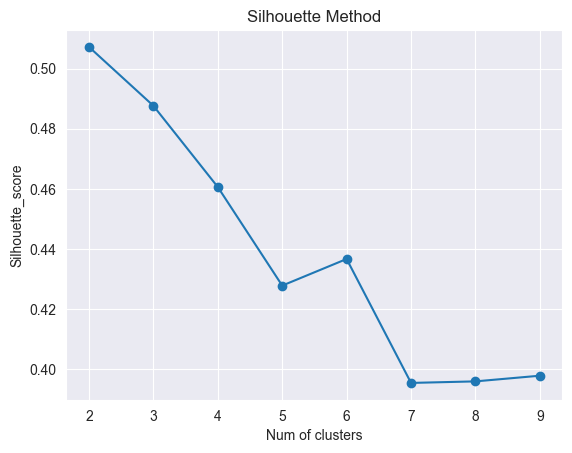

In [26]:
plt.plot(range(2 , 10) , s_scores , marker = 'o')
plt.xlabel('Num of clusters')
plt.ylabel('Silhouette_score')
plt.title('Silhouette Method')
plt.show()

In [27]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters_data = kmeans.fit_predict(data_lat)

In [28]:
clusters_data = clusters_data.reshape(-1, 1)

In [29]:
clusters_data

array([[2],
       [4],
       [1],
       ...,
       [4],
       [2],
       [4]], dtype=int32)

In [30]:
final_data = np.concatenate([data_lat, clusters_data], axis=1)

In [31]:
final_data

array([[-0.71933466, -0.28475139, -0.08074754, -0.02253511,  2.        ],
       [-0.46280745, -0.2325118 ,  0.1105908 ,  0.01285315,  4.        ],
       [-0.26705059, -0.12057801,  0.0327496 , -0.03995161,  1.        ],
       ...,
       [-0.29918924, -0.11200719,  0.00704305, -0.04718925,  4.        ],
       [-0.74454027, -0.24286118, -0.0659187 ,  0.00813256,  2.        ],
       [-0.48372719, -0.21743999,  0.04113454, -0.01592383,  4.        ]])

In [32]:
rfm_cluster_std = pd.DataFrame(final_data,
                               columns=['Recency', 'Frequency',	'Monetary',' CLV', 'Cluster'])

In [33]:
rfm_cluster_std.head()

,Recency,Frequency,Monetary,CLV,Cluster
0,-0.719335,-0.284751,-0.080748,-0.022535,2.0
1,-0.462807,-0.232512,0.110591,0.012853,4.0
2,-0.267051,-0.120578,0.032750,-0.039952,1.0
3,-0.276108,-0.364326,0.728358,0.243795,3.0
4,-0.568370,-0.230653,0.016657,-0.004957,2.0


In [34]:
joblib.dump(kmeans, 'kmeans_rfm_cluster_aut.pkl')

['kmeans_rfm_cluster_aut.pkl']

# 4. Compare DL vs Ensemble:

In [35]:
y_pred = DNN_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2: {r2*100:.2f}%")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE: 0.1017
MAE: 0.2480
R2: 93.17%


In [36]:
XGB = XGBRegressor(random_state=42)
param = {
    'n_estimators': [200, 400, 600],       # عدد الأشجار
    'learning_rate': [0.01, 0.05, 0.1],   # سرعة التعلم
    'max_depth': [4, 6, 8],               # عمق الشجرة
}

grid = GridSearchCV(XGB, param, cv=5, scoring='neg_root_mean_squared_error')
grid.fit(x_train, y_train)

,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'learning_rate': [0.01, 0.05, ...], 'max_depth': [4, 6, ...], 'n_estimators': [200, 400, ...]}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [37]:
print("Best Parameters:", grid.best_params_)
print("Best Score:", - grid.best_score_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 600}
Best Score: 0.16283381923277623


In [38]:
XGB_Best = XGBRegressor(n_estimators=200, learning_rate=0.01,
                        max_depth=4, gamma=0, random_state=42,
                        reg_alpha=0.1)

XGB_Best.fit(x_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [39]:
y_pred_XGB = XGB_Best.predict(x_test)

In [40]:
mae = mean_absolute_error(y_pred_XGB, y_test)
mse = mean_squared_error(y_test, y_pred_XGB)
r2 = r2_score(y_test, y_pred_XGB)

print("Mean Absolute Error :     ", mae)
print("Mean Squared Error :      ", mse)
print("R-Squared Score :         ", round(r2*100, 2),"%")

Mean Absolute Error :      0.2117443987892734
Mean Squared Error :       0.06262785141661319
R-Squared Score :          95.79 %


In [41]:
performance = pd.DataFrame(
    {
     'DL': ['0.23', '0.10', '92.79%'],
     'XGB': ['0.21', '0.06', '95.79%']
     },
    index=[['MAE', 'MSE', 'R2']]
)

In [42]:
performance

,DL,XGB
MAE,0.23,0.21
MSE,0.10,0.06
R2,92.79%,95.79%
